In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mannwhitneyu

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)
print(sns.__version__)

0.9.0


In [28]:
df = pd.read_csv("E:\\Documents\Research Work\\datasets\\3_multilabel.csv", 
                 sep=",")
# column_names = list(df.columns)
df = df[(df.Project_Name != 'githubschool') & (df.Project_Name != 'curriculum')]

df = df[['Closed_Num_Rate', 'Label_Count', 'Comments_Count', 'Following', 'Stars', 'Contributions', 'Merge_Latency', 
         'Rebaseable','Followers',  'Workload', 'Wednesday', 'PR_accept', 'Additions', 'Closed_Num', 'Public_Repos',
          'Deletions_Per_Week', 'Contributor', 'File_Touched_Average', 'Forks_Count', 'Organization_Core_Member',
          'Monday', 'Contain_Fix_Bug', 'Review_Comments_Count', 'Team_Size', 'Last_Comment_Mention', 'Sunday',
          'Thursday', 'Project_Age', 'Open_Issues', 'Intra_Branch', 'Saturday', 'Participants_Count',
          'Comments_Per_Closed_PR', 'Watchers', 'Project_Accept_Rate', 'Point_To_IssueOrPR', 'Accept_Num', 'Close_Latency',
          'Contributor_Num', 'Commits_Average', 'Assignees_Count', 'Friday', 'Commits_PR', 'Wait_Time', 'line_comments_count',
          'Prev_PRs', 'Comments_Per_Merged_PR', 'Files_Changed', 'Day', 'Churn_Average', 'Deletions', 'Language', 'Tuesday',
          'Mergeable_State', 'Additions_Per_Week', 'User_Accept_Rate', 'X1_0', 'X1_1', 'X1_2', 'X1_3', 'X1_4', 'X1_5', 'X1_6',
          'X1_7', 'X1_8', 'X1_9', 'PR_Latency', 'Project_Name', 'PR_Date_Created_At', 'PR_Time_Created_At', 'PR_Date_Closed_At',
          'PR_Time_Closed_At', 'first_response_time', 'first_response', 'latency_after_first_response', 'conflict',
          'title_words_count', 'body_words_count', 'comments_reviews_words_count',
          'Project_Domain', 'Project_Size', 'label']]
column_names = list(df.columns)

df = df.loc[(df['PR_Date_Created_At'] <= '2018-02-28')]

In [29]:
def encode_labels(df1, column_name):
    encoder = LabelEncoder()
    df1[column_name] = [str(label) for label in df1[column_name]]
    encoder.fit(df1[column_name])
    one_hot_vector = encoder.transform(df1[column_name])
    return one_hot_vector

target = 'label'

predictors = [x for x in df.columns if x not in [target, 'PR_accept', 'PR_Date_Created_At', 'PR_Time_Created_At', 'PR_Date_Closed_At',
                                                 'PR_Time_Closed_At', 'Project_Name']]

project_list = ['react', 'django', 'nixpkgs', 'scikit-learn', 'yii2', 'cdnjs', 'terraform', 'cmssw', 'salt', 'tensorflow', 'pandas',
                'symfony', 'moby', 'rails', 'rust', 'kubernetes', 'angular.js', 'laravel', 'opencv',
                ]
start_date = '2017-09-01'
end_date = '2018-02-28'
X_test = df.loc[(df['PR_Date_Created_At'] >= start_date) & (df['PR_Date_Created_At'] <= end_date)]

X_train = df.loc[(df['PR_Date_Created_At'] < start_date)]


# df['Language'] = encode_labels(df, 'Language')
# df['Project_Domain'] = encode_labels(df, 'Project_Domain')

In [4]:
df_des = df.describe().T
# df_des.to_csv('accept_describe.csv', encoding='utf-8')
print(df_des)

                                 count           mean            std  \
Closed_Num_Rate               278418.0       0.201221       0.182807   
Label_Count                   278418.0       1.395409       2.054235   
Comments_Count                278418.0       5.697983       9.517244   
Following                     278418.0      22.680671     135.584894   
Stars                         278418.0   24801.758180   21560.901572   
Contributions                 278418.0     799.617227    1924.226009   
Merge_Latency                 278418.0       4.662719       2.589442   
Rebaseable                    278418.0       0.008552       0.092080   
Followers                     278418.0     308.585889    1452.546653   
Workload                      278418.0     152.586826     151.866617   
Wednesday                     278418.0      23.544547      17.546089   
PR_accept                     278418.0       0.716455       0.450719   
Additions                     278418.0    2226.349033   84720.41

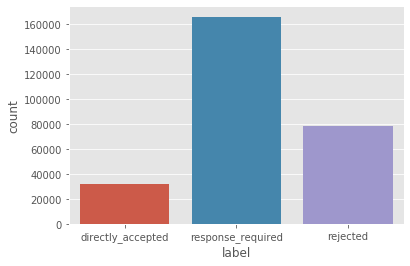

In [30]:
# df.PR_accept.value_counts().plot(kind='bar', title='Count (target)')

sns.countplot(x='label', data=df)

In [31]:
print(df.shape)
print(df.label.value_counts())
print("Total Train dataset size: {}".format(X_train[predictors].shape))
print("Total Test dataset size: {}".format(X_test[predictors].shape))
print('Number of user comments {}'.format(df[df['Comments_Count']>0].shape))
print('Number of review comments {}'.format(df[df['Review_Comments_Count']>0].shape))

(276164, 82)
response_required    165757
rejected              78477
directly_accepted     31930
Name: label, dtype: int64
Total Train dataset size: (249017, 75)
Total Test dataset size: (27147, 75)
Number of user comments (232312, 82)
Number of review comments (69236, 82)


In [32]:
print('Train dataset')
print(X_train.label.value_counts())

print('Test dataset')
print(X_test.label.value_counts())

Train dataset
response_required    147770
rejected              72808
directly_accepted     28439
Name: label, dtype: int64
Test dataset
response_required    17987
rejected              5669
directly_accepted     3491
Name: label, dtype: int64


In [24]:
accepted, rejected = df.PR_accept.value_counts() 
print('Accepted PRs {}'.format(accepted))
print('Rejected PRs {}'.format(rejected))
print('Percentage of accepted PRs {}'.format((accepted*100)/df.shape[0]))
print('Percentage of rejected PRs {}'.format((rejected*100)/df.shape[0]))

print('Train dataset')
accepted_train, rejected_train = X_train.PR_accept.value_counts() 
print('Accepted PRs {}'.format(accepted_train))
print('Rejected PRs {}'.format(rejected_train))

print('Test dataset')
accepted_test, rejected_test = X_test.PR_accept.value_counts() 
print('Accepted PRs {}'.format(accepted_test))
print('Rejected PRs {}'.format(rejected_test))

Accepted PRs 199474
Rejected PRs 78944
Percentage of accepted PRs 71.64551142526705
Percentage of rejected PRs 28.354488574732954
Train dataset
Accepted PRs 176209
Rejected PRs 72808
Test dataset
Accepted PRs 21478
Rejected PRs 5669


In [43]:
df_directly_accepted = df.loc[df.label == 'directly_accepted']
df_directly_rejected = df.loc[df.label == 'directly_rejected']
df_accepted_after = df.loc[df.label == 'accepted_response']
df_rejected_after = df.loc[df.label == 'rejected_response']

print("Percentage of directly accepted PRs {}".format((df_directly_accepted.shape[0]*100)/df.shape[0]))
print("Percentage of directly rejected PRs {}".format((df_directly_rejected.shape[0]*100)/df.shape[0]))
print("Percentage of accepted after response PRs {}".format((df_accepted_after.shape[0]*100)/df.shape[0]))
print("Percentage of rejected after response PRs {}".format((df_rejected_after.shape[0]*100)/df.shape[0]))

Percentage of directly accepted PRs 11.576478532278804
Percentage of directly rejected PRs 1.6723056698920329
Percentage of accepted after response PRs 60.06903289298824
Percentage of rejected after response PRs 26.68218290484092


In [149]:
def analyze_contributor_track_record(df):
    print(df[['User_Accept_Rate', 'Prev_PRs', 'Followers', 'Contributor', 'Contributions']].quantile(
        [0.95, 0.90, 0.80]))
    print(df[['User_Accept_Rate', 'Prev_PRs', 'Followers', 'Contributor', 'Contributions']].describe())

In [150]:
analyze_contributor_track_record(df_directly_accepted)

      User_Accept_Rate  Prev_PRs  Followers  Contributor  Contributions
0.95          1.000000     984.0     2872.0          3.0         7434.0
0.90          0.983968     867.0      847.0          3.0         7434.0
0.80          0.923077     415.0      327.0          2.0         3122.0
       User_Accept_Rate      Prev_PRs     Followers   Contributor  \
count      32231.000000  32231.000000  32231.000000  32231.000000   
mean           0.714219    232.668363    616.586144      1.463405   
std            0.246022    309.752453   2380.292547      0.807516   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.600000     24.000000     18.000000      1.000000   
50%            0.770000     86.000000     75.000000      1.000000   
75%            0.895033    292.000000    205.000000      2.000000   
max            1.224490   1000.000000  26714.000000      4.000000   

       Contributions  
count   32231.000000  
mean     1826.270547  
std      3139.678382 

In [151]:
analyze_contributor_track_record(df_directly_rejected)

      User_Accept_Rate  Prev_PRs  Followers  Contributor  Contributions
0.95          0.894459    565.75      935.0          2.0         3122.0
0.90          0.840045    233.00      548.0          2.0         1249.0
0.80          0.728497    143.00      173.0          1.0          565.0
       User_Accept_Rate     Prev_PRs     Followers  Contributor  Contributions
count       4656.000000  4656.000000   4656.000000  4656.000000    4656.000000
mean           0.416908    99.745060    287.981744     0.973368     603.260095
std            0.313007   201.492025   1392.380940     0.722018    2042.355972
min            0.000000     0.000000      0.000000     0.000000       0.000000
25%            0.057416     4.000000      4.000000     1.000000       0.000000
50%            0.444971    17.000000     20.000000     1.000000       6.000000
75%            0.672535    94.000000    123.500000     1.000000     305.500000
max            1.091743  1000.000000  26697.000000     4.000000   23670.000000


In [48]:
analyze_contributor_track_record(df_accepted_after)

      User_Accept_Rate  Prev_PRs  Followers  Accept_Num  Contributions
0.95          0.964912     714.0      975.0       615.0         4290.0
0.90          0.926910     484.0      516.0       401.0         1976.0
0.80          0.880000     283.0      190.0       228.0          919.0
       User_Accept_Rate       Prev_PRs      Followers     Accept_Num  \
count     167243.000000  167243.000000  167243.000000  167243.000000   
mean           0.700098     171.866781     288.225349     142.565040   
std            0.237491     228.760660    1376.299938     209.388748   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.600000      21.000000      10.000000      13.000000   
50%            0.750000      76.000000      43.000000      56.000000   
75%            0.860000     225.000000     140.000000     177.000000   
max            1.448980    1000.000000   28878.000000    1000.000000   

       Contributions  
count  167243.000000  
mean      800.739038 

In [49]:
analyze_contributor_track_record(df_rejected_after)

      User_Accept_Rate  Prev_PRs  Followers  Accept_Num  Contributions
0.95          0.892910     458.0      866.0       341.0         1750.0
0.90          0.843137     272.0      443.0       193.0          826.0
0.80          0.766169     138.0      158.0        89.0          303.0
       User_Accept_Rate      Prev_PRs     Followers    Accept_Num  \
count      74288.000000  74288.000000  74288.000000  74288.000000   
mean           0.509968     98.558758    222.083822     70.967249   
std            0.285831    176.737742   1006.940044    150.231786   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.333333      7.000000      6.000000      2.000000   
50%            0.564706     28.000000     26.000000     15.000000   
75%            0.732057    104.000000    120.000000     64.000000   
max            1.448980   1000.000000  26713.000000   1000.000000   

       Contributions  
count   74288.000000  
mean      363.968945  
std      1195.554285  
mi

In [131]:
def check_percentage_of_core_non_core_members(df):
    print('Number of core members {}'.format(df[df.Organization_Core_Member == 1].shape[0]))
    print('Number of non-core members {}'.format(df[df.Organization_Core_Member == 0].shape[0]))
    
    print('PRs (%) submitted by core members {}'.format(
    (len(df[df.Organization_Core_Member == 1])*100)/len(df)))

    print('PRs (%) submitted by non-core members {}'.format(
    (len(df[df.Organization_Core_Member == 0])*100)/len(df)))
    

In [132]:
# Directly accepted PRs
check_percentage_of_core_non_core_members(df_directly_accepted)

Number of core members 9973
Number of non-core members 22258
PRs (%) submitted by core members 30.942260556606993
PRs (%) submitted by non-core members 69.057739443393


In [133]:
# Directly rejected PRs
check_percentage_of_core_non_core_members(df_directly_rejected)

Number of core members 661
Number of non-core members 3995
PRs (%) submitted by core members 14.196735395189004
PRs (%) submitted by non-core members 85.80326460481099


In [134]:
# Accepted after response
check_percentage_of_core_non_core_members(df_accepted_after)

Number of core members 48767
Number of non-core members 118476
PRs (%) submitted by core members 29.15936690922789
PRs (%) submitted by non-core members 70.84063309077212


In [44]:
# Rejected after response
check_percentage_of_core_non_core_members(df_rejected_after)

PRs (%) submitted by core members 17.39850312298083
PRs (%) submitted by non-core members 82.60149687701917


In [144]:
def analyze_size_of_PRs(df):
    df['code_churn'] = df['Additions'] + df['Deletions']
    print(df[['code_churn', 'Files_Changed', 'Participants_Count', 'Commits_PR', 
              'Comments_Count', 'Review_Comments_Count', 'line_comments_count']].quantile(
        [0.95, 0.90, 0.80]))
    print(df[['code_churn', 'Files_Changed', 'Participants_Count', 'Commits_PR',
             'Comments_Count', 'Review_Comments_Count', 'line_comments_count']].describe())

In [145]:
analyze_size_of_PRs(df_directly_accepted)

      code_churn  Files_Changed  Participants_Count  Commits_PR  \
0.95       290.0            8.0                 0.0         4.0   
0.90       108.0            4.0                 0.0         2.0   
0.80        40.0            2.0                 0.0         1.0   

      Comments_Count  Review_Comments_Count  line_comments_count  
0.95             0.0                    0.0                  0.0  
0.90             0.0                    0.0                  0.0  
0.80             0.0                    0.0                  0.0  
         code_churn  Files_Changed  Participants_Count    Commits_PR  \
count  3.223100e+04   32231.000000             32231.0  32231.000000   
mean   4.926373e+02       3.628432                 0.0      1.871087   
std    2.293973e+04      46.607187                 0.0      7.537387   
min    0.000000e+00       0.000000                 0.0      0.000000   
25%    2.000000e+00       1.000000                 0.0      1.000000   
50%    6.000000e+00       1.000

In [146]:
analyze_size_of_PRs(df_directly_rejected)

      code_churn  Files_Changed  Participants_Count  Commits_PR  \
0.95      2115.0           34.0                 0.0        16.0   
0.90       346.5            8.0                 0.0         4.0   
0.80        63.0            3.0                 0.0         2.0   

      Comments_Count  Review_Comments_Count  line_comments_count  
0.95             0.0                    0.0                  0.0  
0.90             0.0                    0.0                  0.0  
0.80             0.0                    0.0                  0.0  
         code_churn  Files_Changed  Participants_Count   Commits_PR  \
count  4.656000e+03    4656.000000              4656.0  4656.000000   
mean   1.293785e+04      42.019974                 0.0    15.903136   
std    2.131854e+05     444.428275                 0.0   209.364843   
min    0.000000e+00       0.000000                 0.0     0.000000   
25%    0.000000e+00       0.000000                 0.0     0.000000   
50%    4.000000e+00       1.000000   

In [147]:
analyze_size_of_PRs(df_accepted_after)

      code_churn  Files_Changed  Participants_Count  Commits_PR  \
0.95      1033.0           21.0                 7.0         6.0   
0.90       397.0           10.0                 6.0         4.0   
0.80       135.0            5.0                 5.0         2.0   

      Comments_Count  Review_Comments_Count  line_comments_count  
0.95            22.0                   11.0                  3.0  
0.90            15.0                    6.0                  2.0  
0.80            10.0                    2.0                  1.0  
         code_churn  Files_Changed  Participants_Count     Commits_PR  \
count  1.672430e+05  167243.000000       167243.000000  167243.000000   
mean   8.687839e+02       8.079328            3.133728       2.617861   
std    2.272705e+04     273.277621            2.408210      23.751679   
min    0.000000e+00       0.000000            0.000000       0.000000   
25%    4.000000e+00       1.000000            2.000000       1.000000   
50%    1.900000e+01      

In [148]:
analyze_size_of_PRs(df_rejected_after)

      code_churn  Files_Changed  Participants_Count  Commits_PR  \
0.95     2277.65           39.0                 7.0        14.0   
0.90      574.00           13.0                 6.0         5.0   
0.80      147.00            5.0                 4.0         2.0   

      Comments_Count  Review_Comments_Count  line_comments_count  
0.95            19.0                   10.0                  5.0  
0.90            13.0                    5.0                  3.0  
0.80             9.0                    2.0                  1.0  
         code_churn  Files_Changed  Participants_Count    Commits_PR  \
count  7.428800e+04   74288.000000        74288.000000  74288.000000   
mean   7.680207e+03      34.074844            3.082072     20.540895   
std    1.629116e+05     415.214102            2.266852    268.719712   
min    0.000000e+00       0.000000            0.000000      0.000000   
25%    2.000000e+00       1.000000            2.000000      1.000000   
50%    1.600000e+01       1.000

In [61]:
print(df_directly_rejected.Contributor.value_counts())

1    2952
0    1031
2     451
3     210
4      12
Name: Contributor, dtype: int64


In [62]:
print(df_directly_accepted.Contributor.value_counts())

1    20840
2     6188
3     3785
0      769
4      649
Name: Contributor, dtype: int64


In [67]:
df['label'] = encode_labels(df, 'label')

df_corr = df.corr(method='spearman')
cor_target = abs(df_corr["label"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)

PR_accept    0.8939
label        1.0000
Name: label, dtype: float64


In [100]:
def analyze_lifetime_PRs(df):
    print((df[['PR_Latency', 'first_response_time']]/1440).quantile(
        [0.95, 0.90, 0.80]))
    print((df[['PR_Latency', 'first_response_time']]).describe())

In [101]:
analyze_lifetime_PRs(df_directly_accepted)

      PR_Latency  first_response_time
0.95    3.588090             3.588773
0.90    1.683206             1.684120
0.80    0.702986             0.702998
          PR_Latency  first_response_time
count   32231.000000         32231.000000
mean     1581.100981          1582.144302
std     12040.165367         12041.406979
min         0.016667             0.016667
25%        18.533333            18.533333
50%       130.250000           130.250000
75%       718.958333           719.100000
max    889113.850000        889113.850000


In [135]:
def analyze_PRs_within_hour(df):
    df['PR_latency_hours'] = df['PR_Latency']/60
    df['PR_latency_days'] = df['PR_Latency']/1440

    prs_merged_within_hour = len(df[df['PR_latency_hours']<1])
    prs_merged_within_hour_by_members = len(df[(df['PR_latency_hours']<1) 
                                               & (df['Organization_Core_Member']==1)])
    prs_merged_within_hour_by_community = len(df[(df['PR_latency_hours']<1) 
                                                 & (df['Organization_Core_Member']==0)])
    total_merge_prs = len(df)
    print("Percentage of PRs accepted/rejected within one hour: {}%".format(
        ((prs_merged_within_hour*100)/total_merge_prs)))
    print("Percentage of PRs accepted/rejected within one hour by members: {}%".format(
        ((prs_merged_within_hour_by_members*100)/prs_merged_within_hour)))
    print("Percentage of PRs accepted/rejected within one hour by community: {}%".format(
    ((prs_merged_within_hour_by_community*100)/prs_merged_within_hour)))

In [97]:
analyze_PRs_within_hour(df_directly_accepted)

Percentage of PRs merged within one hour: 37.988272160342525%
Percentage of PRs merged within one hour by members: 38.034955896765766%
Percentage of PRs merged within one hour by community: 61.965044103234234%


In [102]:
analyze_lifetime_PRs(df_accepted_after)

      PR_Latency  first_response_time
0.95   31.446126            11.535194
0.90   15.530870             5.081248
0.80    6.491711             1.713456
         PR_Latency  first_response_time
count  1.672430e+05         1.672430e+05
mean   1.069568e+04         4.492270e+03
std    3.910143e+04         3.163344e+04
min    3.333333e-02        -2.513107e+05
25%    2.711833e+02         9.400000e+00
50%    1.504450e+03         1.765000e+02
75%    6.853292e+03         1.448358e+03
max    2.601656e+06         2.843669e+06


In [99]:
analyze_PRs_within_hour(df_accepted_after)

Percentage of PRs merged within one hour: 11.842648122791388%
Percentage of PRs merged within one hour by members: 32.1165303443401%
Percentage of PRs merged within one hour by community: 67.8834696556599%


In [103]:
analyze_lifetime_PRs(df_directly_rejected)

      PR_Latency  first_response_time
0.95   15.725692            15.725692
0.90    4.656117             4.656117
0.80    0.891528             0.891528
         PR_Latency  first_response_time
count  4.656000e+03         4.656000e+03
mean   7.059154e+03         7.059154e+03
std    4.423082e+04         4.423082e+04
min    0.000000e+00         0.000000e+00
25%    5.058333e+00         5.058333e+00
50%    5.185833e+01         5.185833e+01
75%    8.162625e+02         8.162625e+02
max    1.180702e+06         1.180702e+06


In [104]:
analyze_PRs_within_hour(df_directly_rejected)

Percentage of PRs merged within one hour: 52.55584192439863%
Percentage of PRs merged within one hour by members: 11.606048222313037%
Percentage of PRs merged within one hour by community: 88.39395177768696%


In [105]:
analyze_lifetime_PRs(df_rejected_after)

      PR_Latency  first_response_time
0.95  199.262443            48.633631
0.90  100.992069            14.808637
0.80   34.588919             2.883931
         PR_Latency  first_response_time
count  7.428800e+04         7.428800e+04
mean   5.395787e+04         1.388184e+04
std    1.543043e+05         8.628655e+04
min    0.000000e+00        -4.233441e+06
25%    2.846042e+02         1.174583e+01
50%    2.934400e+03         1.941333e+02
75%    3.028462e+04         2.185783e+03
max    2.894586e+06         3.030550e+06


In [106]:
analyze_PRs_within_hour(df_rejected_after)

Percentage of PRs merged within one hour: 14.159756622873143%
Percentage of PRs merged within one hour by members: 15.058465633615363%
Percentage of PRs merged within one hour by community: 84.94153436638464%


In [138]:
def analyze_first_response_within_hour(df):
    df['PR_latency_hours'] = df['first_response_time']/60
    df['PR_latency_days'] = df['first_response_time']/1440

    prs_merged_within_hour = len(df[df['PR_latency_hours']<1])
    prs_merged_within_hour_by_members = len(df[(df['PR_latency_hours']<1) 
                                               & (df['Organization_Core_Member']==1)])
    prs_merged_within_hour_by_community = len(df[(df['PR_latency_hours']<1) 
                                                 & (df['Organization_Core_Member']==0)])
    prs_merged_within_hour = len(df[(df['PR_latency_hours']<1) 
                                               & (df['Organization_Core_Member']==1)])
    total_merge_prs = len(df)
    print("Percentage of PRs responded within one hour: {}%".format(
        ((prs_merged_within_hour*100)/total_merge_prs)))
    print("Percentage of PRs responded within one hour by members: {}%".format(
        ((prs_merged_within_hour_by_members*100)/prs_merged_within_hour)))
    print("Percentage of PRs responded within one hour by community: {}%".format(
    ((prs_merged_within_hour_by_community*100)/prs_merged_within_hour)))

In [141]:
analyze_first_response_within_hour(df_accepted_after)

Percentage of PRs responded within one hour: 39.4796792690875%
Percentage of PRs responded within one hour by members: 40.9150801944659%
Percentage of PRs responded within one hour by community: 59.0849198055341%


In [140]:
analyze_first_response_within_hour(df_rejected_after)

Percentage of PRs responded within one hour: 38.91745638595736%
Percentage of PRs responded within one hour by members: 24.388641001694857%
Percentage of PRs responded within one hour by community: 75.61135899830515%


In [65]:
def calculate_mannwhitneyu(value1, value2): 
    #print('Results of Unpaired Mann Whiteny Test')
    stat, p = mannwhitneyu(value1, value2)
    print('Statistics= {0}, p= {1}'.format(stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [54]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    print("Delta Effect Size is {}".format(size))
    print("Delta Effect value is {}".format(d))
    return d, size

def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two


In [48]:
from scipy.stats import kruskal
def calcualte_kruskal_test(df1, df2, df3, df4):
    print('Results of kruskal test')
    stat, p = kruskal(df1, df2, df3, df4)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [160]:
print('Check latency significance')
calcualte_kruskal_test(df_directly_accepted.PR_Latency, df_directly_rejected.PR_Latency, 
                       df_accepted_after.PR_Latency, df_rejected_after.PR_Latency)

Results of kruskal test
Statistics=322371334.140, p=0.000
Different distributions (reject H0)


In [162]:
print('Check contributors track record significance') # 'User_Accept_Rate', 'Prev_PRs', 'Followers',
calcualte_kruskal_test(df_directly_accepted.User_Accept_Rate, df_directly_rejected.User_Accept_Rate, 
                       df_accepted_after.User_Accept_Rate, df_rejected_after.User_Accept_Rate)
calcualte_kruskal_test(df_directly_accepted.Prev_PRs, df_directly_rejected.Prev_PRs, 
                       df_accepted_after.Prev_PRs, df_rejected_after.Prev_PRs)
calcualte_kruskal_test(df_directly_accepted.Followers, df_directly_rejected.Followers, 
                       df_accepted_after.Followers, df_rejected_after.Followers)

Check contributors track record significance
Results of kruskal test
Statistics=322833779.199, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=316740437.986, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=312994231.279, p=0.000
Different distributions (reject H0)


In [116]:
d, size = cliffsDelta(df_accepted_after.PR_Latency, df_rejected_after.PR_Latency)

Delta Effect Size is small
Delta Effect value is -0.15126559410112062


In [117]:
d, size = cliffsDelta(df_directly_accepted.PR_Latency, df_directly_rejected.PR_Latency)

Delta Effect Size is negligible
Delta Effect value is 0.10963266565528203


In [118]:
calculate_mannwhitneyu(df_directly_accepted.PR_Latency, df_accepted_after.PR_Latency)

Results of Unpaired Mann Whiteny Test
Statistics= 1299031110.0, p= 0.0
Different distribution (reject H0)


In [119]:
d, size = cliffsDelta(df_directly_accepted.PR_Latency, df_accepted_after.PR_Latency)

Delta Effect Size is large
Delta Effect value is -0.518021330868059


In [121]:
calculate_mannwhitneyu(df_directly_accepted.PR_Latency, df_rejected_after.PR_Latency)

Results of Unpaired Mann Whiteny Test
Statistics= 536301754.0, p= 0.0
Different distribution (reject H0)


In [123]:
d, size = cliffsDelta(df_directly_accepted.PR_Latency, df_rejected_after.PR_Latency)

Delta Effect Size is large
Delta Effect value is -0.5520322324175406


In [124]:
calculate_mannwhitneyu(df_directly_rejected.PR_Latency, df_rejected_after.PR_Latency)

Results of Unpaired Mann Whiteny Test
Statistics= 75945308.0, p= 0.0
Different distribution (reject H0)


In [125]:
d, size = cliffsDelta(df_directly_rejected.PR_Latency, df_rejected_after.PR_Latency)

Delta Effect Size is large
Delta Effect value is -0.5608637332702742


In [126]:
print('Check whether or not core members and non-core members are treated same')
calculate_mannwhitneyu(df_directly_accepted.PR_Latency[df_directly_accepted['Organization_Core_Member']==1], 
                       df_directly_accepted.PR_Latency[df_directly_accepted['Organization_Core_Member']==0])

Check whether or not core members and non-core members are treated same
Results of Unpaired Mann Whiteny Test
Statistics= 93254481.5, p= 4.867288213519858e-117
Different distribution (reject H0)


In [128]:
d, size = cliffsDelta(df_directly_accepted.PR_Latency[df_directly_accepted['Organization_Core_Member']==1], 
                       df_directly_accepted.PR_Latency[df_directly_accepted['Organization_Core_Member']==0])

Delta Effect Size is small
Delta Effect value is -0.15979018541003293


In [127]:
print('Check whether or not core members and non-core members are treated same')
calculate_mannwhitneyu(df_accepted_after.PR_Latency[df_accepted_after['Organization_Core_Member']==1], 
                       df_accepted_after.PR_Latency[df_accepted_after['Organization_Core_Member']==0])

Check whether or not core members and non-core members are treated same
Results of Unpaired Mann Whiteny Test
Statistics= 2706605878.5, p= 5.2278155766962904e-92
Different distribution (reject H0)


In [129]:
d, size = cliffsDelta(df_accepted_after.PR_Latency[df_accepted_after['Organization_Core_Member']==1], 
                       df_accepted_after.PR_Latency[df_accepted_after['Organization_Core_Member']==0])

Delta Effect Size is negligible
Delta Effect value is -0.0630884487798494


In [142]:
print('Check human first response')
calculate_mannwhitneyu(df_accepted_after.first_response_time, df_rejected_after.first_response_time)

Check human first response
Results of Unpaired Mann Whiteny Test
Statistics= 5969887437.0, p= 3.027448985758335e-53
Different distribution (reject H0)


In [143]:
d, size = cliffsDelta(df_accepted_after.first_response_time, df_rejected_after.first_response_time)

Delta Effect Size is negligible
Delta Effect value is -0.038986424712888386


In [154]:
print('Check significance for contributors')
calculate_mannwhitneyu(df_directly_accepted.User_Accept_Rate, df_directly_rejected.User_Accept_Rate)
calculate_mannwhitneyu(df_directly_accepted.Prev_PRs, df_directly_rejected.Prev_PRs)
calculate_mannwhitneyu(df_directly_accepted.Followers, df_directly_rejected.Followers)

Check significance for contributors
Results of Unpaired Mann Whiteny Test
Statistics= 34418676.5, p= 0.0
Different distribution (reject H0)
Results of Unpaired Mann Whiteny Test
Statistics= 46325337.0, p= 0.0
Different distribution (reject H0)
Results of Unpaired Mann Whiteny Test
Statistics= 53903314.0, p= 7.605970590474949e-213
Different distribution (reject H0)


In [155]:
print('Check significance for contributors')
d, size = cliffsDelta(df_directly_accepted.User_Accept_Rate, df_directly_rejected.User_Accept_Rate)
d, size = cliffsDelta(df_directly_accepted.Prev_PRs, df_directly_rejected.Prev_PRs)
d, size = cliffsDelta(df_directly_accepted.Followers, df_directly_rejected.Followers)

Check significance for contributors
Delta Effect Size is large
Delta Effect value is 0.5412908425443862
Delta Effect Size is medium
Delta Effect value is 0.38260681510756595
Delta Effect Size is small
Delta Effect value is 0.2816125934126086


In [82]:
for project in project_list:
    df_project = df.loc[df.Project_Name == project]
    print(project)
#     print(df_project.PR_accept.value_counts())
    print(df_project.label.value_counts())
    accepted, rejected = df_project.PR_accept.value_counts() 
    print('Percentage of accepted PRs {}'.format((accepted*100)/df_project.shape[0]))
    print('Percentage of rejected PRs {}'.format((rejected*100)/df_project.shape[0]))

react
accepted_response    3791
rejected_response    1853
directly_accepted     792
directly_rejected      85
Name: label, dtype: int64
Percentage of accepted PRs 70.2806318049379
Percentage of rejected PRs 29.719368195062106
django
rejected_response    5820
accepted_response    1996
directly_accepted    1469
directly_rejected     321
Name: label, dtype: int64
Percentage of accepted PRs 63.928794503435356
Percentage of rejected PRs 36.071205496564644
nixpkgs
accepted_response    16259
rejected_response     5752
directly_accepted     5410
directly_rejected      371
Name: label, dtype: int64
Percentage of accepted PRs 77.96848013816926
Percentage of rejected PRs 22.03151986183074
scikit-learn
accepted_response    3328
rejected_response    1816
directly_accepted     143
directly_rejected     103
Name: label, dtype: int64
Percentage of accepted PRs 64.39703153988869
Percentage of rejected PRs 35.60296846011132
yii2
accepted_response    3424
rejected_response    2156
directly_accepted     2

In [84]:
for project in project_list:
    df_project = X_test.loc[X_test.Project_Name == project]
    print(project)
    print(df_project.label.value_counts())
    accepted, rejected = df_project.PR_accept.value_counts() 
    print('Percentage of accepted PRs {}'.format((accepted*100)/df_project.shape[0]))
    print('Percentage of rejected PRs {}'.format((rejected*100)/df_project.shape[0]))

react
accepted_response    489
rejected_response    188
directly_accepted    124
directly_rejected     10
Name: label, dtype: int64
Percentage of accepted PRs 75.58569667077681
Percentage of rejected PRs 24.41430332922318
django
accepted_response    269
directly_accepted    231
rejected_response    133
directly_rejected     31
Name: label, dtype: int64
Percentage of accepted PRs 75.3012048192771
Percentage of rejected PRs 24.698795180722893
nixpkgs
accepted_response    3455
directly_accepted    1260
rejected_response     738
directly_rejected      28
Name: label, dtype: int64
Percentage of accepted PRs 86.02444809341361
Percentage of rejected PRs 13.97555190658639
scikit-learn
accepted_response    304
rejected_response     91
directly_accepted     33
directly_rejected     13
Name: label, dtype: int64
Percentage of accepted PRs 76.41723356009071
Percentage of rejected PRs 23.582766439909296
yii2
accepted_response    240
rejected_response     92
directly_accepted     30
directly_rejected

In [44]:
def analyze_project_features(df):
    print((df[['Project_Age', 'Close_Latency', 'Comments_Per_Merged_PR', 'Project_Accept_Rate', 'File_Touched_Average',  
               'Forks_Count', 'Merge_Latency', 'Closed_Num_Rate', 'Comments_Per_Closed_PR']]).quantile(
        [0.95, 0.90, 0.80]))
    print((df[['Project_Age', 'Close_Latency', 'Comments_Per_Merged_PR', 'Project_Accept_Rate', 'File_Touched_Average',  
               'Forks_Count', 'Merge_Latency', 'Closed_Num_Rate', 'Comments_Per_Closed_PR']]).describe())

In [45]:
analyze_project_features(df_directly_accepted)

      Project_Age  Close_Latency  Comments_Per_Merged_PR  Project_Accept_Rate  \
0.95  1984.218810      49.782801                4.750055             0.945792   
0.90  1727.244676      38.708639                3.319812             0.939192   
0.80  1559.485824      31.212032                2.613739             0.930869   

      File_Touched_Average  Forks_Count  Merge_Latency  Closed_Num_Rate  \
0.95             12.183690      11602.5       8.017929         0.500000   
0.90              8.413502       7719.0       6.919546         0.400000   
0.80              4.856464       3777.0       5.812065         0.295455   

      Comments_Per_Closed_PR  
0.95                5.347970  
0.90                5.045036  
0.80                4.756757  
        Project_Age  Close_Latency  Comments_Per_Merged_PR  \
count  32231.000000   32231.000000            32231.000000   
mean    1096.299851      16.534791                2.290048   
std      526.739135      16.059652                1.294884   
mi

In [46]:
analyze_project_features(df_directly_rejected)

      Project_Age  Close_Latency  Comments_Per_Merged_PR  Project_Accept_Rate  \
0.95  1933.946340      47.375052                6.609189             0.928051   
0.90  1750.478833      37.005177                4.789316             0.810920   
0.80  1525.521250      31.532732                3.176354             0.770170   

      File_Touched_Average  Forks_Count  Merge_Latency  Closed_Num_Rate  \
0.95             18.763059      14515.0       8.016854         0.750000   
0.90             17.007042      10550.5       7.225828         0.640574   
0.80              8.626198       5791.0       6.565222         0.500000   

      Comments_Per_Closed_PR  
0.95                7.638711  
0.90                5.973325  
0.80                4.924264  
       Project_Age  Close_Latency  Comments_Per_Merged_PR  \
count  4656.000000    4656.000000             4656.000000   
mean    999.820754      19.299797                2.753660   
std     558.367234      15.407698                1.870222   
min   

In [51]:
print('Check project features significance') # 'User_Accept_Rate', 'Prev_PRs', 'Followers',
calcualte_kruskal_test(df_directly_accepted.Project_Age, df_directly_rejected.Project_Age, 
                       df_accepted_after.Project_Age, df_rejected_after.Project_Age)
calcualte_kruskal_test(df_directly_accepted.Close_Latency, df_directly_rejected.Close_Latency, 
                       df_accepted_after.Close_Latency, df_rejected_after.Close_Latency)
calcualte_kruskal_test(df_directly_accepted.Comments_Per_Merged_PR, df_directly_rejected.Comments_Per_Merged_PR, 
                       df_accepted_after.Comments_Per_Merged_PR, df_rejected_after.Comments_Per_Merged_PR)

calcualte_kruskal_test(df_directly_accepted.Project_Accept_Rate, df_directly_rejected.Project_Accept_Rate, 
                       df_accepted_after.Project_Accept_Rate, df_rejected_after.Project_Accept_Rate)
calcualte_kruskal_test(df_directly_accepted.File_Touched_Average, df_directly_rejected.File_Touched_Average, 
                       df_accepted_after.File_Touched_Average, df_rejected_after.File_Touched_Average)
calcualte_kruskal_test(df_directly_accepted.Forks_Count, df_directly_rejected.Forks_Count, 
                       df_accepted_after.Forks_Count, df_rejected_after.Forks_Count)
calcualte_kruskal_test(df_directly_accepted.Team_Size,df_directly_rejected.Team_Size, 
                       df_accepted_after.Team_Size, df_rejected_after.Team_Size)
calcualte_kruskal_test(df_directly_accepted.Stars, df_directly_rejected.Stars, 
                       df_accepted_after.Stars, df_rejected_after.Stars)

Check project features significance
Results of kruskal test
Statistics=311402391.733, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=313382723.676, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=322598735.769, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=322098030.114, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=316811407.398, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=312394772.687, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=313755338.851, p=0.000
Different distributions (reject H0)
Results of kruskal test
Statistics=315748172.152, p=0.000
Different distributions (reject H0)


In [57]:
calculate_mannwhitneyu(df_directly_accepted.Stars, df_directly_rejected.Stars)
calculate_mannwhitneyu(df_accepted_after.Stars, df_rejected_after.Stars)
calculate_mannwhitneyu(df_directly_accepted.Stars, df_accepted_after.Stars)
calculate_mannwhitneyu(df_accepted_after.Stars, df_rejected_after.Stars)

Results of Unpaired Mann Whiteny Test
Statistics= 59273373.5, p= 1.8355767632197167e-122
Different distribution (reject H0)
Results of Unpaired Mann Whiteny Test
Statistics= 5523233926.0, p= 0.0
Different distribution (reject H0)


In [69]:
def check_pair_wise_mannwhitneyu(feature):
    print('For feature {} the test results:'.format(feature))
    print('Directly Accepted VS Directly Rejected')
    calculate_mannwhitneyu(df_directly_accepted[feature], df_directly_rejected[feature])
    d, size = cliffsDelta(df_directly_accepted[feature], df_directly_rejected[feature])
    print('Directly Accepted VS Accepted After')
    calculate_mannwhitneyu(df_directly_accepted[feature], df_accepted_after[feature])
    d, size = cliffsDelta(df_directly_accepted[feature], df_accepted_after[feature])
    print('Directly Accepted VS Rejected After')
    calculate_mannwhitneyu(df_directly_accepted[feature], df_rejected_after[feature])
    d, size = cliffsDelta(df_directly_accepted[feature], df_rejected_after[feature])
    print('Accepted After VS Directly Rejected')
    calculate_mannwhitneyu(df_accepted_after[feature], df_directly_rejected[feature])
    d, size = cliffsDelta(df_accepted_after[feature], df_directly_rejected[feature])
    print('Accepted After VS Rejected After')
    calculate_mannwhitneyu(df_accepted_after[feature], df_rejected_after[feature])
    d, size = cliffsDelta(df_accepted_after[feature], df_rejected_after[feature])
    print('Rejected After VS Directly Rejected')
    calculate_mannwhitneyu(df_directly_rejected[feature], df_rejected_after[feature])
    d, size = cliffsDelta(df_directly_rejected[feature], df_rejected_after[feature])
    print()

In [75]:
check_pair_wise_mannwhitneyu('comments_reviews_words_count')

For feature comments_reviews_words_count the test results:
Directly Accepted VS Directly Rejected


ValueError: All numbers are identical in mannwhitneyu

In [70]:
project_features = ['Project_Age', 'Close_Latency', 'Comments_Per_Merged_PR', 'Project_Accept_Rate', 
                    'File_Touched_Average', 'Forks_Count', 'Merge_Latency', 'Closed_Num_Rate', 'Comments_Per_Closed_PR'
                   ]
for f in project_features:
    check_pair_wise_mannwhitneyu(f)

For feature Project_Age the test results:
Directly Accepted VS Directly Rejected
Statistics= 67344799.5, p= 5.1828764038408914e-30
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.10247344235731304
Directly Accepted VS Accepted After
Statistics= 2558502903.0, p= 1.4200547279798248e-47
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.05072032943218153
Directly Accepted VS Rejected After
Statistics= 1167387057.5, p= 5.092870305140771e-11
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.024892665085463953
Accepted After VS Directly Rejected
Statistics= 368752346.0, p= 3.5298718152610867e-10
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.05288248802650743
Accepted After VS Rejected After
Statistics= 6026228517.0, p= 3.437117760977038e-32
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value 

Statistics= 896235988.0, p= 0.0
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is -0.2513825812111369
Accepted After VS Directly Rejected
Statistics= 298551012.5, p= 3.351206980390895e-163
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is -0.23319025567320165
Accepted After VS Rejected After
Statistics= 4716799472.5, p= 0.0
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is -0.24070455719388348
Rejected After VS Directly Rejected
Statistics= 168362186.0, p= 0.001175974811976748
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.026484403506590492

For feature Comments_Per_Closed_PR the test results:
Directly Accepted VS Directly Rejected
Statistics= 72377025.0, p= 4.5843727192156976e-05
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.035407298218050304
Directly Accepted VS Accepted After
Statistics= 15388

In [78]:
integrator_features = ['Review_Comments_Count', 'line_comments_count', 'comments_reviews_words_count']
issue_features = ['Point_To_IssueOrPR', 'Open_Issues']
other_PR_features = ['Workload', 'Commits_Average']

for f in other_PR_features:
    check_pair_wise_mannwhitneyu(f)

For feature Workload the test results:
Directly Accepted VS Directly Rejected
Statistics= 65195265.0, p= 7.44063067570352e-48
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is -0.13112100407912342
Directly Accepted VS Accepted After
Statistics= 1879176468.5, p= 0.0
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is -0.30277037525938016
Directly Accepted VS Rejected After
Statistics= 871636056.0, p= 0.0
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is -0.27193067104774094
Accepted After VS Directly Rejected
Statistics= 316594157.5, p= 1.7269064444736289e-105
Different distribution (reject H0)
Delta Effect Size is small
Delta Effect value is 0.18684755769189318
Accepted After VS Rejected After
Statistics= 5990163012.5, p= 4.8934548252786e-45
Different distribution (reject H0)
Delta Effect Size is negligible
Delta Effect value is 0.03572252677379249
Rejected After VS Directly Rejecte

In [38]:
import time
import numpy as np
project_age = []
for project in project_list:
    df_project = df.loc[df.Project_Name == project]
#     print(project)
#     print(((df_project.Project_Age.max()*30*3600)/31536000))
    project_age.append(((df_project.Project_Age.max()*30*3600)/31536000)+1)

print(np.mean(project_age))
#     print(df_project[['PR_Date_Created_At', 'PR_Time_Created_At']].sort_values(
#         by=['PR_Date_Created_At', 'PR_Time_Created_At'], ascending=True).head(1))
#     print(df_project[['PR_Date_Created_At', 'PR_Time_Created_At']].sort_values(
#         by=['PR_Date_Created_At', 'PR_Time_Created_At'], ascending=True).tail(1))

    

7.152341766469065


In [49]:
print('Whole dataset')
df_merged = df[df.PR_accept == 1]
print(f'PRs merged without a single comment {(len(df_merged[df_merged.Comments_Count==0])*100)/len(df_merged)}')
print(f'PRs merged without a single review comment {(len(df_merged[df_merged.Review_Comments_Count==0])*100)/len(df_merged)}')

for project in project_list:
        print(project)
        df_project = df_merged[df_merged['Project_Name'] == project]
        print(f'PRs merged without a single comment {(len(df_project[df_project.Comments_Count==0])*100)/len(df_project)}')
        print(f'PRs merged without a single review comment {(len(df_project[df_project.Review_Comments_Count==0])*100)/len(df_project)}')
        

Whole dataset
PRs merged without a single comment 17.925136101536577
PRs merged without a single review comment 74.87624692630652
react
PRs merged without a single comment 22.801658302421995
PRs merged without a single review comment 66.48483526074624
django
PRs merged without a single comment 54.54545454545455
PRs merged without a single review comment 65.07936507936508
nixpkgs
PRs merged without a single comment 27.407817619640962
PRs merged without a single review comment 82.34805482486502
scikit-learn
PRs merged without a single comment 4.897723998847594
PRs merged without a single review comment 55.776433304523195
yii2
PRs merged without a single comment 7.003032809484423
PRs merged without a single review comment 79.87317342156052
cdnjs
PRs merged without a single comment 19.332697807435654
PRs merged without a single review comment 82.59294566253575
terraform
PRs merged without a single comment 23.35088262620006
PRs merged without a single review comment 80.96934035305048
cmssw


In [50]:
print('Whole dataset')
df_unmerged = df[df.PR_accept == 0]
print(f'PRs unmerged without a single comment {(len(df_unmerged[df_unmerged.Comments_Count==0])*100)/len(df_unmerged)}')
print(f'PRs unmerged without a single review comment {(len(df_unmerged[df_unmerged.Review_Comments_Count==0])*100)/len(df_unmerged)}')

for project in project_list:
        print(project)
        df_project = df_unmerged[df_unmerged['Project_Name'] == project]
        print(f'PRs unmerged without a single comment {(len(df_project[df_project.Comments_Count==0])*100)/len(df_project)}')
        print(f'PRs unmerged without a single review comment {(len(df_project[df_project.Review_Comments_Count==0])*100)/len(df_project)}')
        

Whole dataset
PRs unmerged without a single comment 8.33619532298854
PRs unmerged without a single review comment 72.10340628805146
react
PRs unmerged without a single comment 5.314757481940145
PRs unmerged without a single review comment 73.06501547987617
django
PRs unmerged without a single comment 6.839276990718124
PRs unmerged without a single review comment 61.227813059762255
nixpkgs
PRs unmerged without a single comment 7.006369426751593
PRs unmerged without a single review comment 78.5072676792422
scikit-learn
PRs unmerged without a single comment 5.992704533611255
PRs unmerged without a single review comment 51.120375195414276
yii2
PRs unmerged without a single comment 8.304498269896193
PRs unmerged without a single review comment 74.69723183391004
cdnjs
PRs unmerged without a single comment 15.275049115913555
PRs unmerged without a single review comment 88.70333988212181
terraform
PRs unmerged without a single comment 8.461538461538462
PRs unmerged without a single review comm

In [9]:
# Merge time of  PRs
df_merged = df[df.PR_accept == 1]
df_unmerged = df[df.PR_accept == 0]
print(f"Median of merged PRs latency: {'%.2f'% df_merged.PR_Latency.median()} in minutes")
print(f"Median of Unmerged PRs latency: {'%.2f'% df_unmerged.PR_Latency.median()} in minutes")

print(f"Mean of merged PRs: {'%.2f'% df_merged.PR_Latency.mean()} in minutes")
print(f"Mean of Unmerged PRs: {'%.2f'% df_unmerged.PR_Latency.mean()} in minutes")

df_merged['PR_latency_hours'] = df_merged['PR_Latency']/60
df_merged['PR_latency_days'] = df_merged['PR_Latency']/1440

prs_merged_within_hour = len(df_merged[df_merged['PR_latency_hours']<1])
prs_merged_within_hour_by_members = len(df_merged[(df_merged['PR_latency_hours']<1) & (df_merged['Organization_Core_Member']==1)])
prs_merged_within_hour_by_community = len(df_merged[(df_merged['PR_latency_hours']<1) & (df_merged['Organization_Core_Member']==0)])
total_merge_prs = len(df_merged)
print(f"Percentage of PRs merged within one hour: {'%.2f'% ((prs_merged_within_hour*100)/total_merge_prs)}%")
print(f"Percentage of PRs merged within one hour by members: {'%.2f'% ((prs_merged_within_hour_by_members*100)/prs_merged_within_hour)}%")
print(f"Percentage of PRs merged within one hour by community: {'%.2f'% ((prs_merged_within_hour_by_community*100)/prs_merged_within_hour)}%")

print('Check the code churn of members and community')
df_members_churn = df_merged[(df_merged['PR_latency_hours']<1) & (df_merged['Organization_Core_Member']==1)]
df_community_churn = df_merged[(df_merged['PR_latency_hours']<1) & (df_merged['Organization_Core_Member']==0)]

df_members_churn['code_churn'] = df_members_churn['Additions'] + df_members_churn['Deletions']
df_community_churn['code_churn'] = df_community_churn['Additions'] + df_community_churn['Deletions']

print(f"Median of member's churn (within hour): {df_members_churn['code_churn'].median()}")
print(f"Median of community's churn (within hour): {df_community_churn['code_churn'].median()}")

print(f"Merged PR latency median (hour): {df_merged['PR_latency_hours'].median()}")
print(f"Merged PR latency median (days): {df_merged['PR_latency_days'].median()}")
print(df_merged['PR_latency_days'].quantile([.95, 0.9, .8]))

print(f"\nCount of merged PRs submitted by members: {len(df_merged.PR_Latency[df_merged['Organization_Core_Member']==1])}")
print(f"Count of merged PRs submitted by community: {len(df_merged.PR_Latency[df_merged['Organization_Core_Member']==0])}")

def calculate_mannwhitneyu(value1, value2): 
    print('\nResults of Unpaired Mann Whiteny Test')
    stat, p = mannwhitneyu(value1, value2)
    print(f'Statistics= {"%.3f" % stat}, p= {"%.9f" % p}')
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
        
calculate_mannwhitneyu(df_merged.PR_Latency, df_unmerged.PR_Latency)

print('Merged PR latency of member vs community')
calculate_mannwhitneyu(df_merged.PR_Latency[df_merged['Organization_Core_Member']==1], df_merged.PR_Latency[df_merged['Organization_Core_Member']==0])

Median of merged PRs latency: 109.98 in minutes
Median of Unmerged PRs latency: 1103.81 in minutes
Mean of merged PRs: 8292.52 in minutes
Mean of Unmerged PRs: 71562.03 in minutes
Percentage of PRs merged within one hour: 41.05%
Percentage of PRs merged within one hour by members: 7.19%
Percentage of PRs merged within one hour by community: 92.81%
Check the code churn of members and community
Median of member's churn (within hour): 23.0
Median of community's churn (within hour): 2.0
Merged PR latency median (hour): 1.8330555555555554
Merged PR latency median (days): 0.0763773148148148
0.95    14.620492
0.90     3.906551
0.80     0.829016
Name: PR_latency_days, dtype: float64

Count of merged PRs submitted by members: 562
Count of merged PRs submitted by community: 3065

Results of Unpaired Mann Whiteny Test
Statistics= 2643228.500, p= 0.000000000
Different distribution (reject H0)
Merged PR latency of member vs community

Results of Unpaired Mann Whiteny Test
Statistics= 493514.500, p=

In [11]:
# d, size = cliffsDelta(df_merged['PR_Latency'], df_unmerged['PR_Latency'])
d, size = cliffsDelta(df_merged.PR_Latency[df_merged['Organization_Core_Member']==1], df_merged.PR_Latency[df_merged['Organization_Core_Member']==0])

print(f"Delta Effect Size is {size}")
print(f"Delta Effect value is {'%.2f'% d}")

Delta Effect Size is medium
Delta Effect value is 0.43


Text(0, 0.5, 'Probability Density')

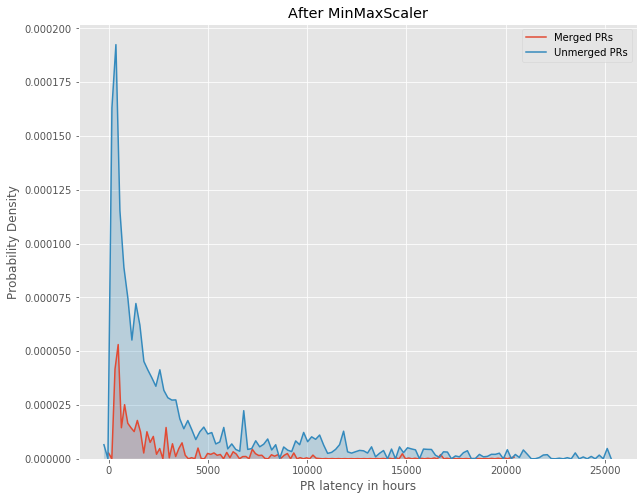

In [12]:
# mm_scaler = preprocessing.MinMaxScaler()
# df_mm = mm_scaler.fit_transform(df[predictors])
# df_mm = pd.DataFrame(df_mm, columns=predictors)

# df_merged = df_mm[df_mm.PR_accept == 1]
# df_unmerged = df_mm[df_mm.PR_accept == 0]


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_merged['PR_Latency']/60, ax=ax1, shade=True, label='Merged PRs')
sns.kdeplot(df_unmerged['PR_Latency']/60, ax=ax1, shade=True, label='Unmerged PRs')

# Setting the X and Y Label 
plt.xlabel('PR latency in hours') 
plt.ylabel('Probability Density') 

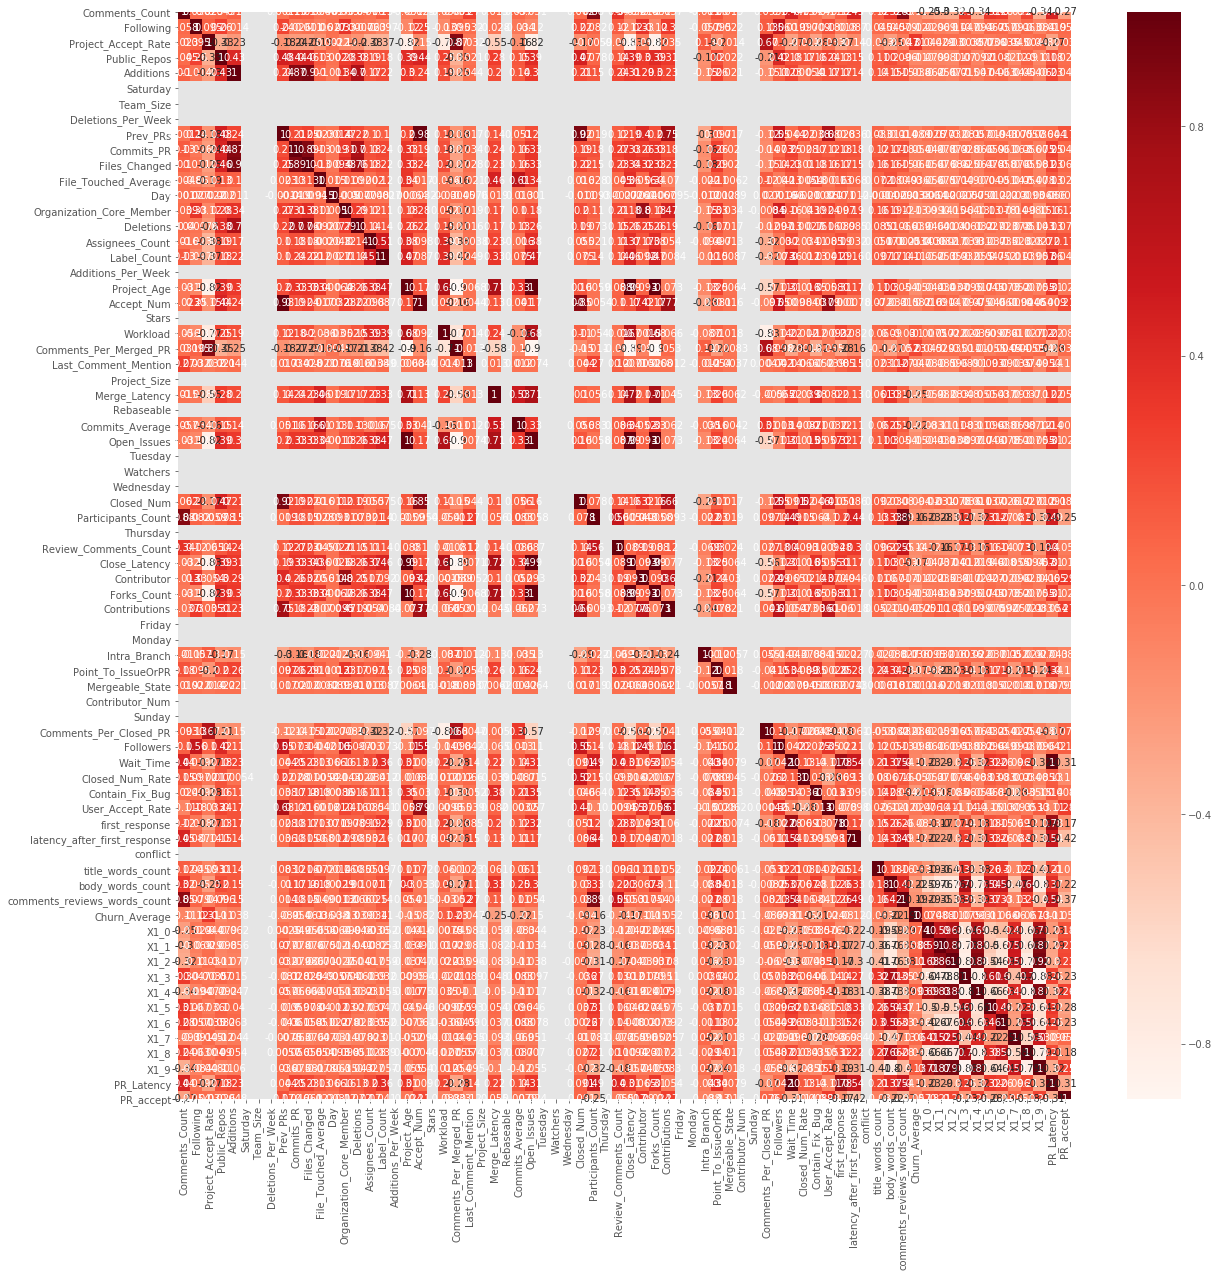

In [14]:
df_proj = df[df.Project_Name=='yii2']
df_corr = df_proj[predictors].corr(method='spearman')
# plt.matshow(df_corr)
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

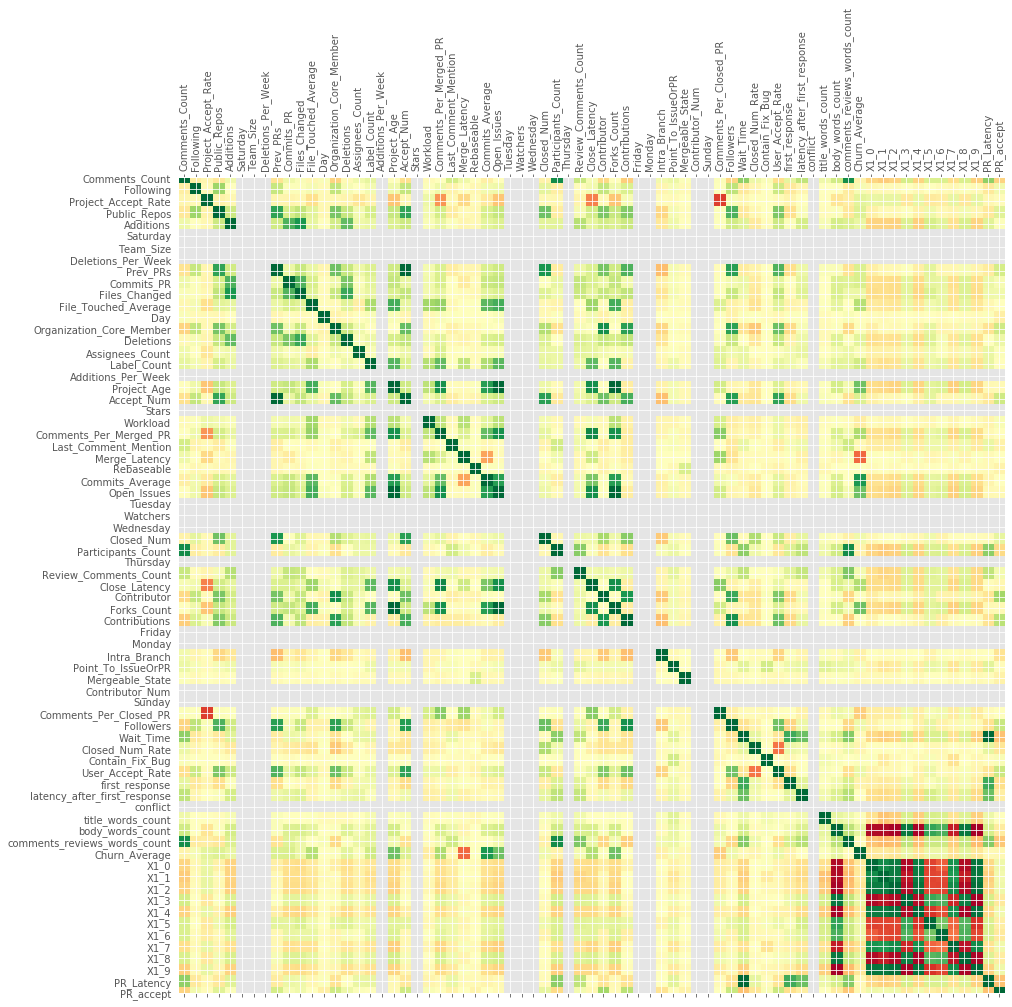

In [258]:
labels = [c for c in df_corr.columns]

fig = plt.figure(figsize=(15,15))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(df_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels, rotation=90)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)
plt.show()


In [259]:
# Correlation with output variable
project_list = ['react', 'django', 'nixpkgs', 'scikit-learn', 'yii2', 'cdnjs', 'terraform', 'cmssw', 'salt', 'tensorflow', 'pandas',
                'symfony', 'moby', 'rails', 'rust', 'kubernetes', #'angular.js', 'laravel', 'curriculum', 'opencv', 'githubschool'
                ]
def calculate_correlation():
    for project in project_list:
        print(project)
        df_project = df[df['Project_Name'] == project]
        df_corr = df_project.corr(method='spearman')
        cor_target = abs(df_corr["PR_accept"]) #Selecting highly correlated features
#         print(cor_target)
        relevant_features = cor_target[cor_target>0.2]

        print(relevant_features)

calculate_correlation()

react
Comments_Count                  0.222856
Prev_PRs                        0.228694
Organization_Core_Member        0.251818
Accept_Num                      0.249088
Contributor                     0.413211
Contributions                   0.326301
Followers                       0.271454
Wait_Time                       0.295215
User_Accept_Rate                0.264292
comments_reviews_words_count    0.272981
PR_Latency                      0.295215
PR_accept                       1.000000
Name: PR_accept, dtype: float64
django
Comments_Count                  0.391739
Project_Accept_Rate             0.296606
Prev_PRs                        0.391978
Organization_Core_Member        0.414127
Project_Age                     0.347954
Accept_Num                      0.428934
Workload                        0.228544
Closed_Num                      0.245076
Participants_Count              0.282403
Close_Latency                   0.250788
Contributor                     0.467892
Forks_Count 

In [15]:
df_corr = df.corr(method='spearman')
cor_target = abs(df_corr["PR_accept"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)

latency_after_first_response    0.422308
PR_accept                       1.000000
Name: PR_accept, dtype: float64


In [16]:
count_median = 0
count_mean = 0
for project in project_list:
#     print(project)
    df_project = df[df['Project_Name'] == project]
    df_project['merged_days'] = df_project.PR_Latency[df_project['PR_accept']==1]/1440
#     print(f"For {project} the merged latency median (in days) is: {df_project['merged_days'].median()}")
#     print(f"For {project} the merged latency mean (in days) is: {df_project['merged_days'].mean()}")
    if df_project['merged_days'].median()<=1:
        count_median+=1
    if df_project['merged_days'].mean()<=9:
        count_mean+=1
print(f"{(count_median*100)/len(project_list)}% of projects have a median (in days) less than 1 for merged PRs latency.")
print(f"{(count_mean*100)/len(project_list)}% of projects have a mean (in days) less than 1 for merged PRs latency.")      

NameError: name 'project_list' is not defined

In [17]:
print(df_merged[['PR_Latency', 'User_Accept_Rate', 'Prev_PRs']].corr(method='spearman'))

                  PR_Latency  User_Accept_Rate  Prev_PRs
PR_Latency          1.000000         -0.046509  0.088255
User_Accept_Rate   -0.046509          1.000000  0.655139
Prev_PRs            0.088255          0.655139  1.000000


In [195]:
for project in project_list:
    df_project = df[df['Project_Name'] == project]

#     print(df_project[['Team_Size', 'File_Touched_Average']].describe().T)
    

In [25]:
# Size of pull requests
df['code_churn'] = df['Additions'] + df['Deletions']
print(df[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].quantile([.95, 0.9, .8]))
print(df[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].median())

print(df[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].describe())

print(f'PRs without a single comment {(len(df[df.Comments_Count==0])*100)/len(df)}')

print(f'PRs without a single review comment {(len(df[df.Review_Comments_Count==0])*100)/len(df)}')


      Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
0.95         7.0           10.0                   10.0            12.0   
0.90         4.0            5.0                    5.0             8.0   
0.80         2.0            3.0                    1.0             5.0   

      Participants_Count  code_churn  
0.95                 5.0       411.3  
0.90                 4.0       182.0  
0.80                 3.0        62.0  
Commits_PR               1.0
Files_Changed            1.0
Review_Comments_Count    0.0
Comments_Count           1.0
Participants_Count       1.0
code_churn               4.0
dtype: float64
        Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
count  5939.000000    5939.000000            5939.000000     5939.000000   
mean      2.713588       4.477016               1.639333        3.447045   
std      46.352567      42.239425               5.576340        5.824740   
min       0.000000       0.000000               0.0000

In [26]:
# Size of merged pull requests
df_merged['code_churn'] = df_merged['Additions'] + df_merged['Deletions']
print(df_merged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].quantile([.95, 0.9, .8]))
print(df_merged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].median())

print(df_merged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].describe())

      Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
0.95         7.0           11.0                    9.0             9.7   
0.90         5.0            5.0                    4.0             6.0   
0.80         2.0            3.0                    1.0             3.0   

      Participants_Count  code_churn  
0.95                 4.0       481.7  
0.90                 3.0       212.4  
0.80                 3.0        79.0  
Commits_PR               1.0
Files_Changed            1.0
Review_Comments_Count    0.0
Comments_Count           1.0
Participants_Count       1.0
code_churn               4.0
dtype: float64
        Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
count  3627.000000    3627.000000            3627.000000     3627.000000   
mean      1.981803       3.602702               1.579267        2.645713   
std       4.783821      22.038229               5.536719        5.022062   
min       0.000000       0.000000               0.0000

In [27]:
print(f'Merged PRs without a single comment {(len(df_merged[df_merged.Comments_Count==0])*100)/len(df_merged)}')

print(f'Merged PRs without a single review comment {(len(df_merged[df_merged.Review_Comments_Count==0])*100)/len(df_merged)}')

Merged PRs without a single comment 7.003032809484423
Merged PRs without a single review comment 79.87317342156052


In [29]:
# Size of unmerged pull requests
df_unmerged['code_churn'] = df_unmerged['Additions'] + df_unmerged['Deletions']
print(df_unmerged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].quantile([.95, 0.9, .8]))
print(df_unmerged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].median())

print(f'UnMerged PRs without a single comment {(len(df_unmerged[df_unmerged.Comments_Count==0])*100)/len(df_unmerged)}')

print(f'UnMerged PRs without a single review comment {(len(df_unmerged[df_unmerged.Review_Comments_Count==0])*100)/len(df_unmerged)}')


print(df_unmerged[['Commits_PR', 'Files_Changed', 'Review_Comments_Count', 'Comments_Count', 'Participants_Count', 'code_churn']].describe())

      Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
0.95         6.0            8.0                   10.0            16.0   
0.90         4.0            4.0                    5.0            10.9   
0.80         2.0            2.0                    1.8             7.0   

      Participants_Count  code_churn  
0.95                 6.0      294.25  
0.90                 4.0      119.00  
0.80                 4.0       41.80  
Commits_PR               1.0
Files_Changed            1.0
Review_Comments_Count    0.0
Comments_Count           3.0
Participants_Count       2.0
code_churn               3.0
dtype: float64
UnMerged PRs without a single comment 8.304498269896193
UnMerged PRs without a single review comment 74.69723183391004
        Commits_PR  Files_Changed  Review_Comments_Count  Comments_Count  \
count  2312.000000    2312.000000            2312.000000     2312.000000   
mean      3.861592       5.848616               1.733564        4.704152   
std      74

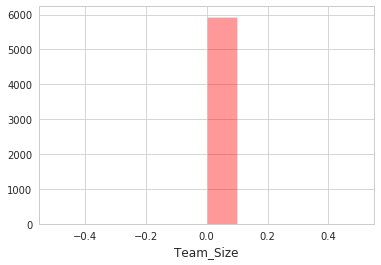

In [22]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df[predictors])
df_mm = pd.DataFrame(df_mm, columns=predictors)

# df['log_file_changed'] = np.log(df['Commits_PR'])

# set the background style of the plot 
sns.set_style('whitegrid') 
sns.distplot(df_mm['Team_Size'], kde = False, color ='red', bins=10) 


In [23]:
df[['conflict', 'Point_To_IssueOrPR', 'title_words_count', 'body_words_count','comments_reviews_words_count']].describe()

,conflict,Point_To_IssueOrPR,title_words_count,body_words_count,comments_reviews_words_count
count,5939.0,5939.000000,5939.000000,5939.000000,5939.00000
mean,0.0,0.344334,5.333389,20.449739,113.22849
std,0.0,0.475191,2.833361,44.950839,342.48428
min,0.0,0.000000,1.000000,0.000000,0.00000
25%,0.0,0.000000,3.000000,0.000000,1.00000
50%,0.0,0.000000,5.000000,10.000000,11.00000
75%,0.0,1.000000,7.000000,25.000000,89.00000
max,0.0,1.000000,25.000000,2107.000000,7861.00000


In [24]:
df_time = abs(df[['PR_Latency', 'first_response', 'latency_after_first_response']]/1440)

df_time = df_time[~(df_time['PR_Latency']==0)]

df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].describe()

,PR_Latency,first_response,latency_after_first_response
count,5939.000000,5939.000000,5939.000000
mean,22.863042,8.900402,15.695528
std,89.373786,52.508774,74.227649
min,0.000035,0.000035,0.000000
25%,0.019317,0.010729,0.000046
50%,0.148646,0.065856,0.000116
75%,1.823675,0.405179,0.306285
max,1044.933970,920.107234,1044.926481


In [375]:
df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].quantile([.95, .9, .8])

,PR_Latency,first_response,latency_after_first_response
0.95,64.717521,18.851565,51.687226
0.90,25.506090,6.913065,19.908627
0.80,7.985602,2.088600,6.045535


In [376]:
df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].median()

PR_Latency                      0.929016
first_response                  0.149711
latency_after_first_response    0.602257
dtype: float64

In [387]:
# within = abs(df['first_response']).median()
within = 60
prs_response_within_hour = len(df[abs(df['first_response'])< within])
prs_response_within_hour_accepted = len(df[(abs(df['first_response'])<within) & 
                                                  (df['PR_accept']==1)])
prs_response_within_hour_rejected = len(df[abs((df['first_response'])<within) & 
                                                    (df['PR_accept']==0)])
total_prs = len(df)
print(f"Percentage of PRs responded within median time: {'%.2f'% ((prs_response_within_hour*100)/total_prs)}%")
print(f"Percentage of PRs responded within median time (accepted): {'%.2f'% ((prs_response_within_hour_accepted*100)/prs_response_within_hour)}%")
print(f"Percentage of PRs responded within median time (rejected): {'%.2f'% ((prs_response_within_hour_rejected*100)/prs_response_within_hour)}%")

Percentage of PRs responded within median time: 37.33%
Percentage of PRs responded within median time (accepted): 75.00%
Percentage of PRs responded within median time (rejected): 25.01%


In [386]:
df_merged = df[df.PR_accept == 1]
df_unmerged = df[df.PR_accept == 0]


prs_merged_within_hour = len(df_merged[abs(df_merged['first_response'])<60])
prs_merged_within_hour_by_members = len(df_merged[(abs(df_merged['first_response'])<60) & 
                                                  (df_merged['Organization_Core_Member']==1)])
prs_merged_within_hour_by_community = len(df_merged[abs((df_merged['first_response'])<60) & 
                                                    (df_merged['Organization_Core_Member']==0)])
total_merge_prs = len(df_merged)
print(f"Percentage of PRs responded within one hour: {'%.2f'% ((prs_merged_within_hour*100)/total_merge_prs)}%")
print(f"Percentage of PRs responded within one hour (by members): {'%.2f'% ((prs_merged_within_hour_by_members*100)/prs_merged_within_hour)}%")
print(f"Percentage of PRs responded within one hour (by community): {'%.2f'% ((prs_merged_within_hour_by_community*100)/prs_merged_within_hour)}%")

df_time = abs(df_merged[['PR_Latency', 'first_response', 'latency_after_first_response']]/60)
df_time = df_time[~(df_time['PR_Latency']==0)]

df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].describe()


Percentage of PRs responded within one hour: 37.63%
Percentage of PRs responded within one hour (by members): 41.59%
Percentage of PRs responded within one hour (by community): 58.42%


,PR_Latency,first_response,latency_after_first_response
count,186258.000000,186258.000000,186258.000000
mean,155.660308,67.758476,134.805206
std,610.889388,387.480118,585.466992
min,0.000278,0.000000,0.000000
25%,2.626806,0.203056,0.924167
50%,19.271528,3.309167,12.990556
75%,91.325556,24.550486,70.409444
max,43360.930278,30302.465278,43351.592500


In [382]:
df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].quantile([.95, .9, .8])

,PR_Latency,first_response,latency_after_first_response
0.95,656.670500,266.566333,554.049819
0.90,318.643528,120.685778,265.305028
0.80,128.101722,41.533444,102.315333


In [351]:
calculate_mannwhitneyu(df_merged.first_response, df_unmerged.first_response)


Results of Unpaired Mann Whiteny Test
Statistics= 5518170618.500, p= 0.000000000
Different distribution (reject H0)


In [352]:
d, size = cliffsDelta(df_merged.first_response, df_unmerged.first_response)

print(f"Delta Effect Size is {size}")
print(f"Delta Effect value is {'%.2f'% d}")

Delta Effect Size is negligible
Delta Effect value is -0.08


In [384]:
df_time = abs(df_unmerged[['PR_Latency', 'first_response', 'latency_after_first_response']]/60)

df_time = df_time[~(df_time['PR_Latency']==0)]

df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].describe()

,PR_Latency,first_response,latency_after_first_response
count,64057.000000,64057.000000,64057.000000
mean,898.139976,322.584230,729.185488
std,2512.400059,1364.139808,2267.915889
min,0.000278,0.000000,0.000000
25%,3.998333,0.223889,0.281389
50%,48.724722,4.841667,21.113889
75%,526.915556,59.179722,333.412222
max,48243.105278,50509.166389,50330.765000


In [354]:
df_time[['PR_Latency', 'first_response', 'latency_after_first_response']].quantile([.95, .9, .8])

,PR_Latency,first_response,latency_after_first_response
0.95,199.246146,67.579875,165.095789
0.90,103.672569,22.877382,82.042190
0.80,35.775731,4.766032,24.538417


In [355]:
calculate_mannwhitneyu(df_merged.latency_after_first_response, df_unmerged.latency_after_first_response)


Results of Unpaired Mann Whiteny Test
Statistics= 5328626862.500, p= 0.000000000
Different distribution (reject H0)


In [356]:
d, size = cliffsDelta(df_merged.latency_after_first_response, df_unmerged.latency_after_first_response)

print(f"Delta Effect Size is {size}")
print(f"Delta Effect value is {'%.2f'% d}")

Delta Effect Size is negligible
Delta Effect value is -0.11


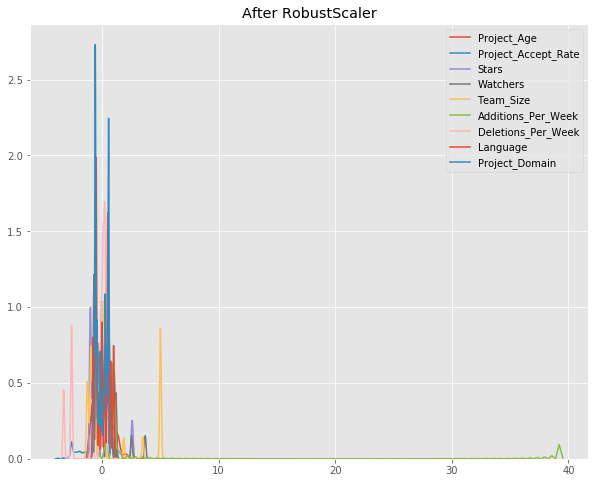

In [37]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=column_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['Project_Age'], ax=ax1)
sns.kdeplot(df_r['Project_Accept_Rate'], ax=ax1)
sns.kdeplot(df_r['Stars'], ax=ax1)
sns.kdeplot(df_r['Watchers'], ax=ax1)
sns.kdeplot(df_r['Team_Size'], ax=ax1)
sns.kdeplot(df_r['Additions_Per_Week'], ax=ax1)
sns.kdeplot(df_r['Deletions_Per_Week'], ax=ax1)
sns.kdeplot(df_r['Language'], ax=ax1)
sns.kdeplot(df_r['Project_Domain'], ax=ax1)

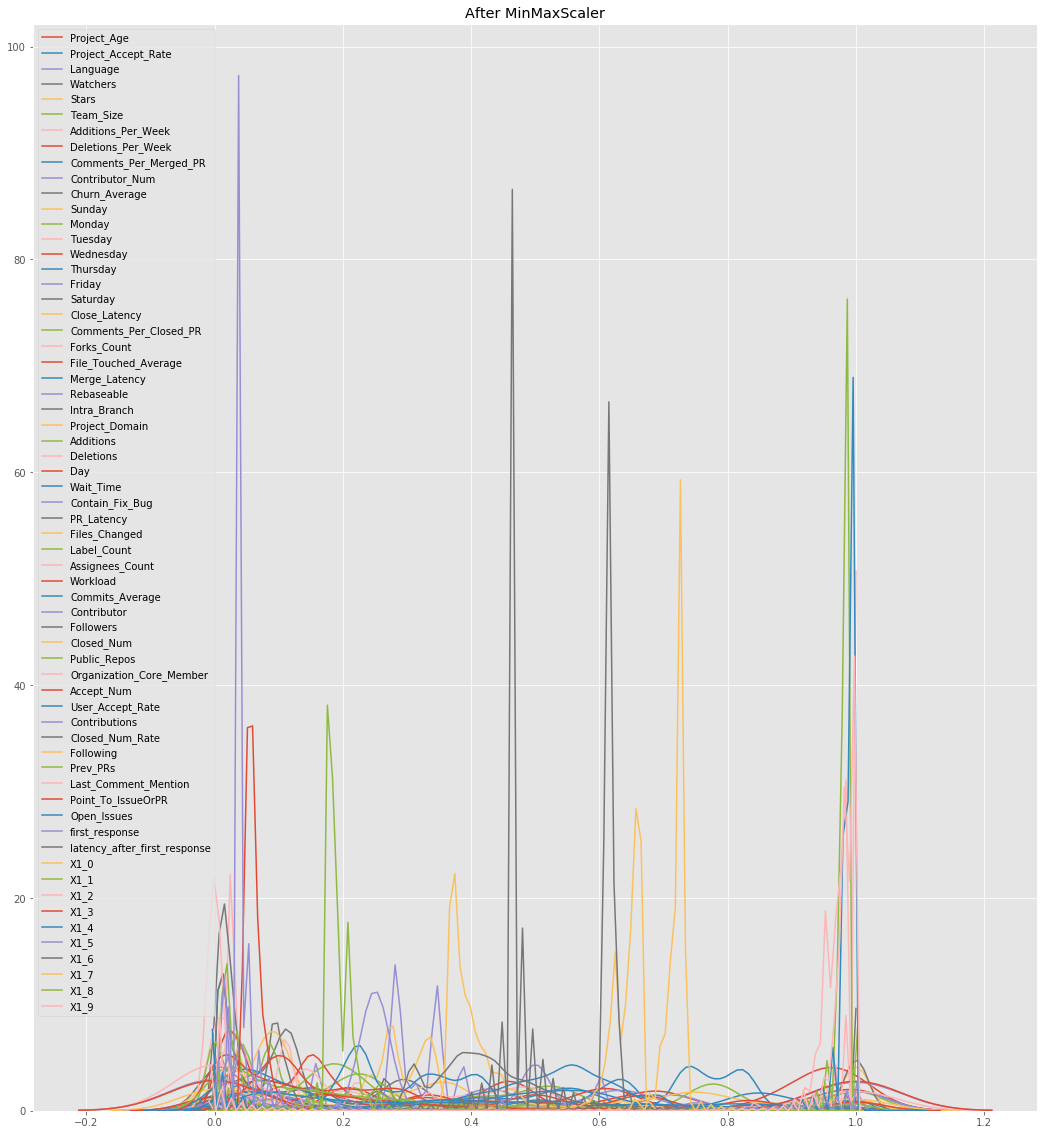

In [58]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X_test)

df_mm = pd.DataFrame(df_mm, columns=predictors)

fig, (ax1) = plt.subplots(ncols=1, figsize=(18, 20))
ax1.set_title('After MinMaxScaler')

for col_name in predictors:

    sns.kdeplot(df_mm[col_name], ax=ax1)


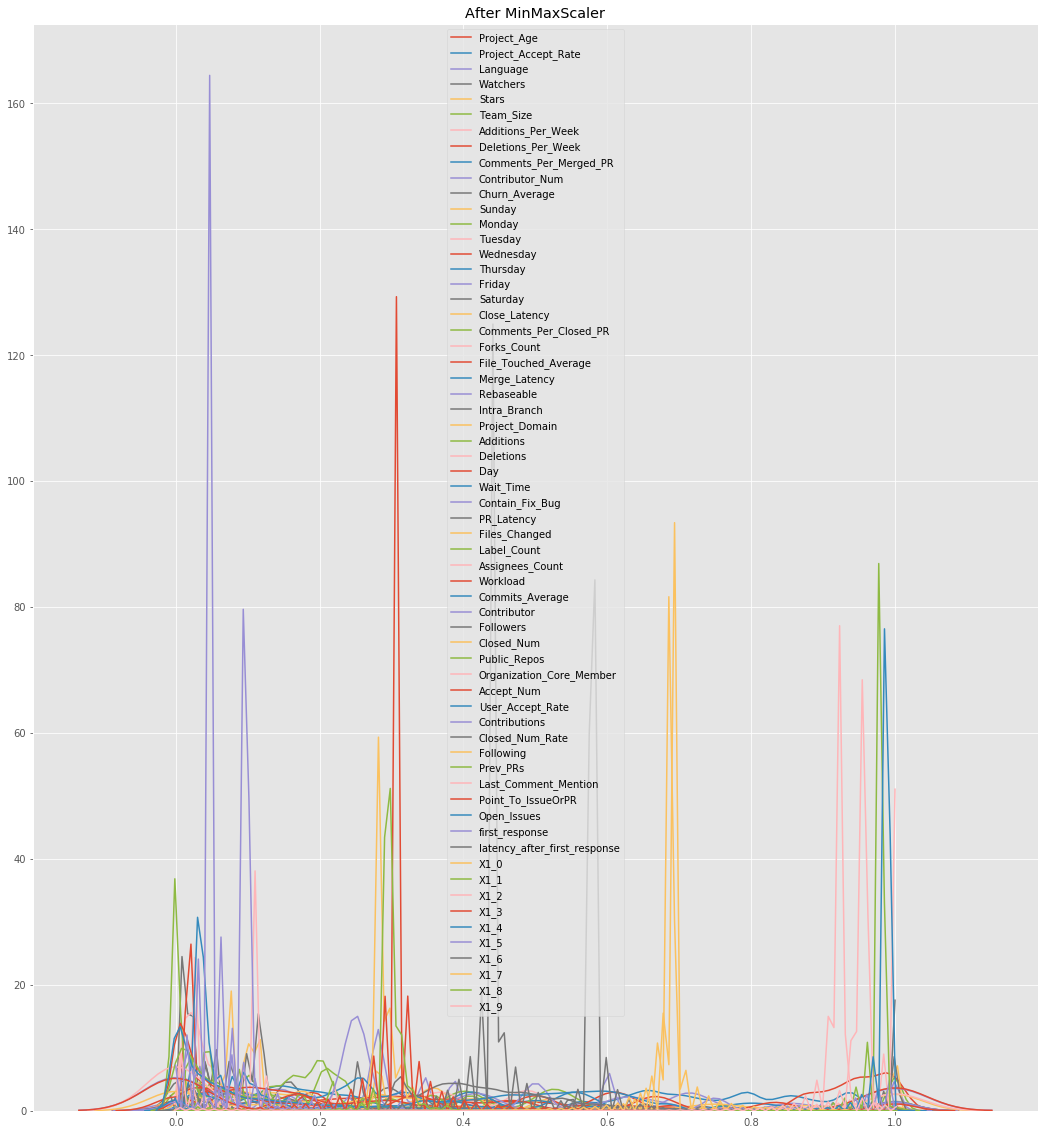

In [59]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X_train)

df_mm = pd.DataFrame(df_mm, columns=predictors)

fig, (ax1) = plt.subplots(ncols=1, figsize=(18, 20))
ax1.set_title('After MinMaxScaler')

for col_name in predictors:

    sns.kdeplot(df_mm[col_name], ax=ax1)

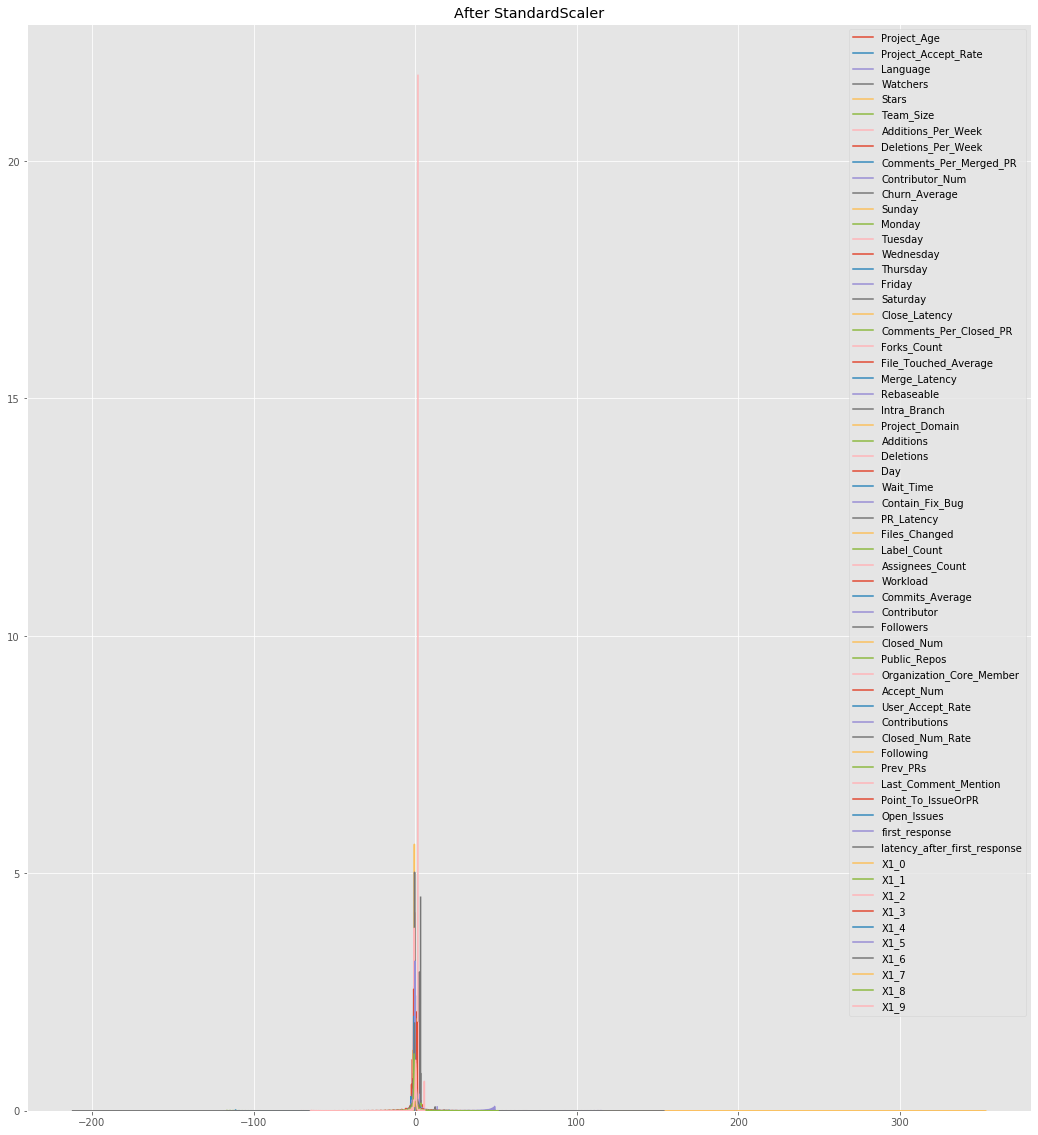

In [51]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=column_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(18, 20))
ax1.set_title('After StandardScaler')

for col_name in column_names:

    sns.kdeplot(df_s[col_name], ax=ax1)

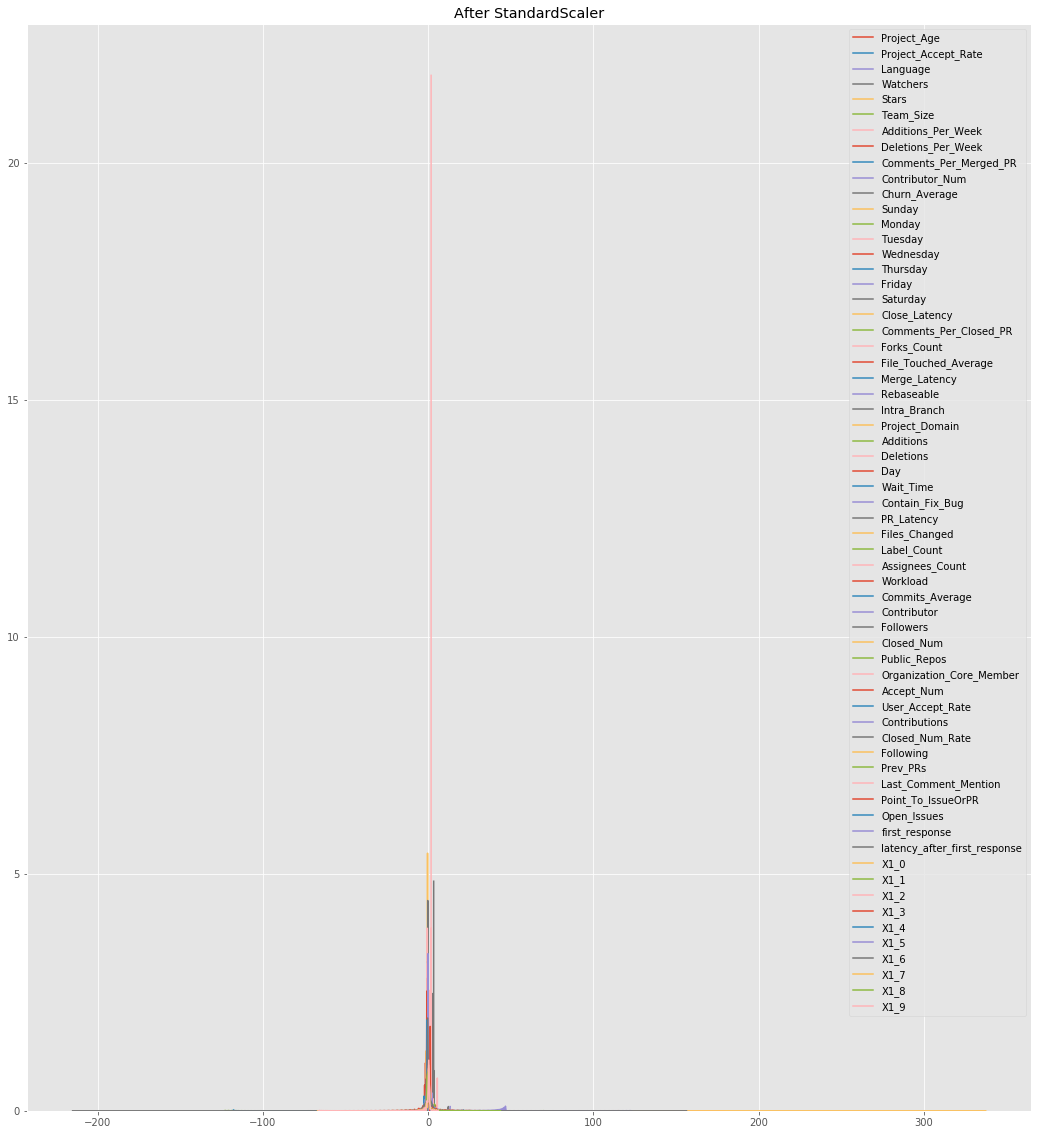

In [61]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(X_train)

df_s = pd.DataFrame(df_s, columns=predictors)

fig, (ax1) = plt.subplots(ncols=1, figsize=(18, 20))
ax1.set_title('After StandardScaler')

for col_name in predictors:

    sns.kdeplot(df_s[col_name], ax=ax1)

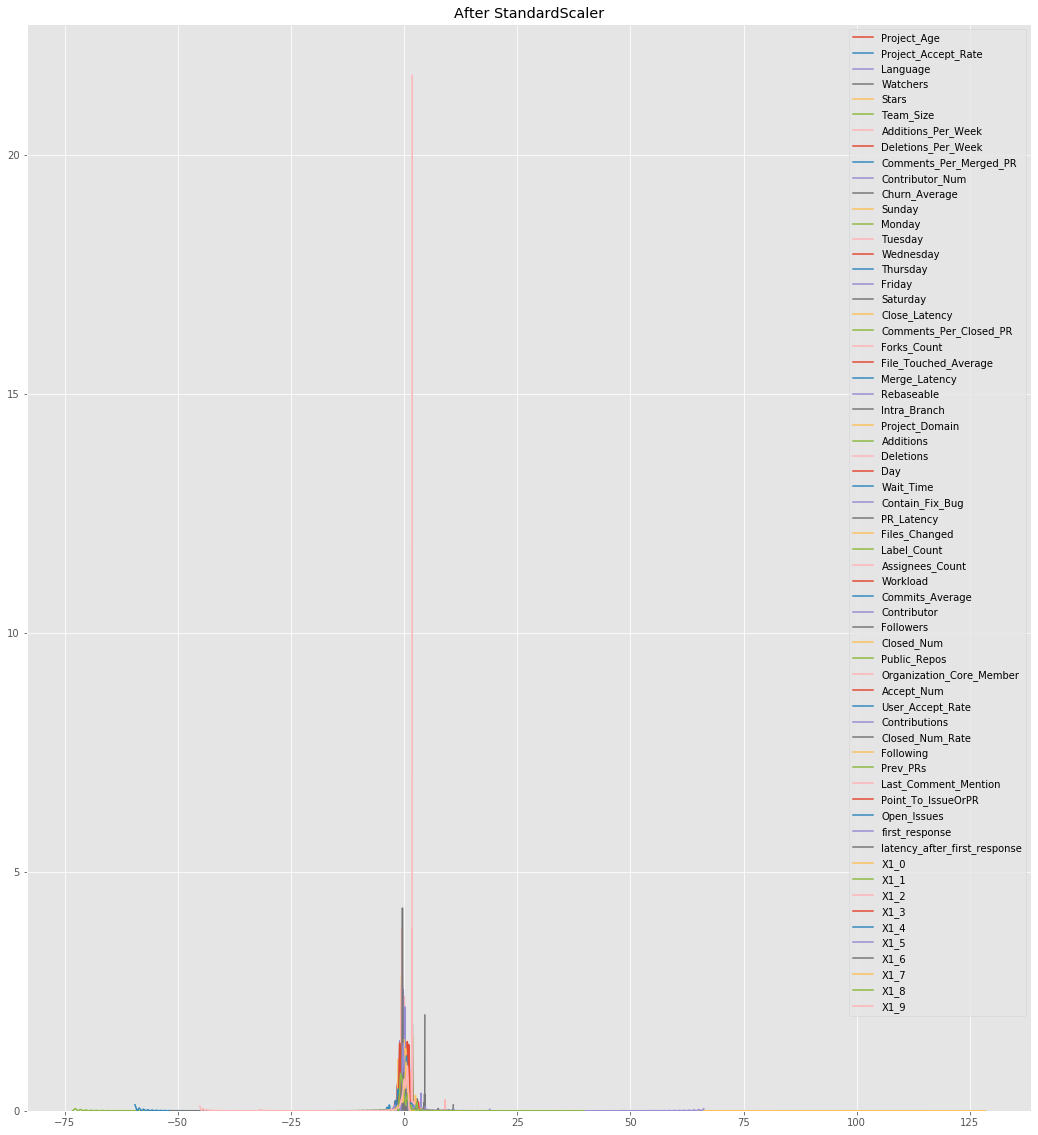

In [62]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(X_test)

df_s = pd.DataFrame(df_s, columns=predictors)

fig, (ax1) = plt.subplots(ncols=1, figsize=(18, 20))
ax1.set_title('After StandardScaler')

for col_name in predictors:

    sns.kdeplot(df_s[col_name], ax=ax1)